<a href="https://colab.research.google.com/github/NainaniJatinZ/MLnow_2.0/blob/main/Univariate_Linear_Regression/Univariate_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course

`Univariate Linear Regression`

[Link to Download the dataset](https://www.kaggle.com/smid80/weatherww2)


Weather Conditions in World War Two


Relation between Maximum and Minimum Daily Temperature

**Date Created**: June 11, 2021

**Author**:
 Jatin Sunil Nainani 

**Reach out**:
[Email](nainani.jatin.0@gmail.com) | [GitHub](https://github.com/NainaniJatinZ) | [LinkedIn](https://www.linkedin.com/in/jatin-nainani-a6b2331b3/)

[[Course Repository](https://github.com/NainaniJatinZ/MLnow_2.0)]


## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/GirlScriptML/Univariate'

/content/drive/MyDrive/Colab Notebooks/GirlScriptML/Univariate


In [ ]:
ls

 carbon_nanotubes.csv  'Summary of Weather.csv'
 Coordinate_u.csv       Univariate_LinearRegression_NanoTube.ipynb


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
import os

In [ ]:
nanoFrame = pd.read_csv('Summary of Weather.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
nanoFrame.head(10)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,6,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,7,7,T,NaN,NaN,83.0,73.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,8,0.14,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,7,9,T,NaN,NaN,81.0,73.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,7,10,0.14,NaN,NaN,78.0,71.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
uniData = nanoFrame[["MaxTemp", "MinTemp"]]

uniData.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


In [ ]:
uniData.to_csv('TempDiff.csv')

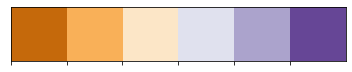

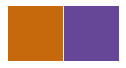

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

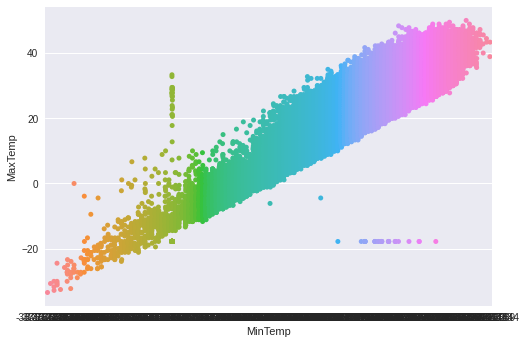

In [ ]:
sns.stripplot(y= "MaxTemp", x="MinTemp", data=uniData)

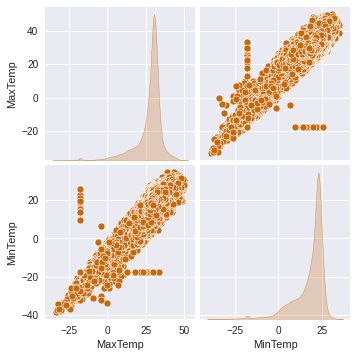

In [ ]:
sns.pairplot(uniData,x_vars=['MaxTemp',"MinTemp"],y_vars=['MaxTemp',"MinTemp"],diag_kind='kde')

## Splitting Dataset

In [ ]:
splitRatio = 0.7  #@param {type:'slider',min:'0.4',max:'1.0',step:'0.05'}
XTrain = uniData.sample(frac=splitRatio,random_state=41)
XTest = uniData.drop(XTrain.index)

print(XTrain.head())
print(XTest.head())

          MaxTemp    MinTemp
36086   28.888889  22.222222
78517   20.000000  12.777778
116034  29.444444  22.222222
100134  29.444444  20.000000
41219   20.000000  14.444444
      MaxTemp    MinTemp
6   28.333333  22.777778
7   26.666667  22.222222
13  26.111111  22.222222
14  25.555556  22.777778
16  28.333333  22.222222


In [ ]:
yTrain = XTrain.pop("MaxTemp")
yTest = XTest.pop("MaxTemp")

print(yTrain.head())
print(yTest.head())

36086     28.888889
78517     20.000000
116034    29.444444
100134    29.444444
41219     20.000000
Name: MaxTemp, dtype: float64
6     28.333333
7     26.666667
13    26.111111
14    25.555556
16    28.333333
Name: MaxTemp, dtype: float64


In [ ]:
print(XTrain.head())
print(XTest.head())

          MinTemp
36086   22.222222
78517   12.777778
116034  22.222222
100134  20.000000
41219   14.444444
      MinTemp
6   22.777778
7   22.222222
13  22.222222
14  22.777778
16  22.222222


## Building the model

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
learningRate = 0.00006 #@param {type:'slider',min:'0.00001',max:'0.01',step:'0.00005'}
model.compile(
              loss = "mean_absolute_error"  #@param ["mean_absolute_error","mean_squared_error"]
              ,
              optimizer = tf.keras.optimizers.Adam(learning_rate=learningRate),
              metrics = ['mae','mse']
)

# Callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="mae",patience=5)

# Training Model

In [ ]:
numEpochs = 200 #@param {type:'slider',min:'10',max:'1000',step:'10'}
history = model.fit(x = XTrain,
                    y=yTrain,
                    validation_data=(XTest,yTest),
                    epochs=numEpochs,
                   callbacks=[early_stopping])

Epoch 1/200
2604/2604 [==============================] - 4s 2ms/step - loss: 5.9203 - mae: 5.9203 - mse: 51.6867 - val_loss: 5.2866 - val_mae: 5.2866 - val_mse: 43.8995
Epoch 2/200
2604/2604 [==============================] - 3s 1ms/step - loss: 4.8692 - mae: 4.8692 - mse: 39.8595 - val_loss: 4.6997 - val_mae: 4.6997 - val_mse: 39.0772
Epoch 3/200
2604/2604 [==============================] - 3s 1ms/step - loss: 4.5935 - mae: 4.5935 - mse: 38.1733 - val_loss: 4.6131 - val_mae: 4.6131 - val_mse: 38.8340
Epoch 4/200
2604/2604 [==============================] - 4s 1ms/step - loss: 4.5509 - mae: 4.5509 - mse: 37.8902 - val_loss: 4.5833 - val_mae: 4.5833 - val_mse: 38.4065
Epoch 5/200
2604/2604 [==============================] - 4s 1ms/step - loss: 4.5230 - mae: 4.5230 - mse: 37.4619 - val_loss: 4.5554 - val_mae: 4.5554 - val_mse: 37.9351
Epoch 6/200
2604/2604 [==============================] - 4s 1ms/step - loss: 4.4957 - mae: 4.4957 - mse: 36.9876 - val_loss: 4.5281 - val_mae: 4.5281 - val

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 1)                   2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


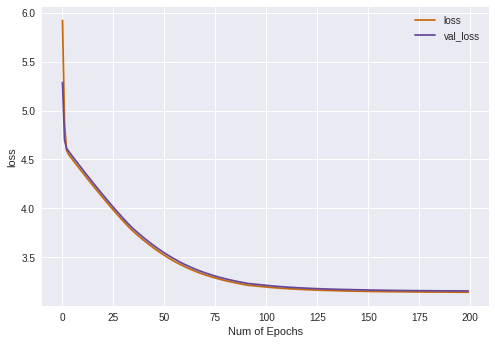

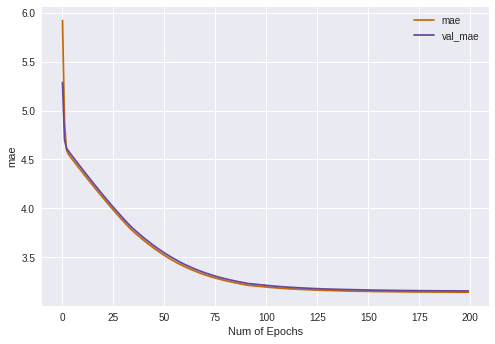

In [ ]:
# string --> loss , mae, mse

def plotGraphs(history, string): 
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Num of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

plotGraphs(history, 'loss')
plotGraphs(history, 'mae')

In [ ]:
testPreds = model.predict(XTest).flatten() #array of all prediction values

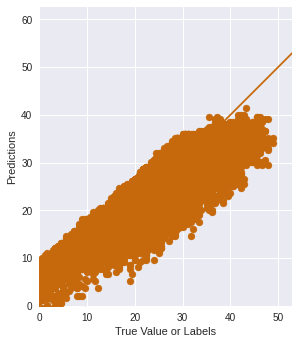

In [ ]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(yTest, testPreds)

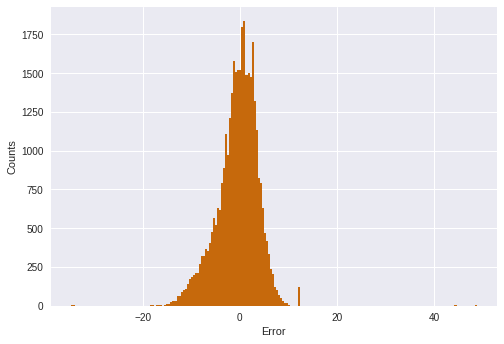

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, yTest, numEpochs)